# Cleaning of Training Data:
### Cropping previously categorized calls into 1 second clips that will then serve as the training data for the model.

In [2]:
import os 
import numpy as np 
from pydub import AudioSegment
from pydub.playback import play 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import wave
from glob import glob
import librosa

### Trimming and plotting samples to show the waveforms before and after cropping. 

extracting from... /Users/calzada/birdsongs/wood/process_data/raw_train_data/laugh_wavs


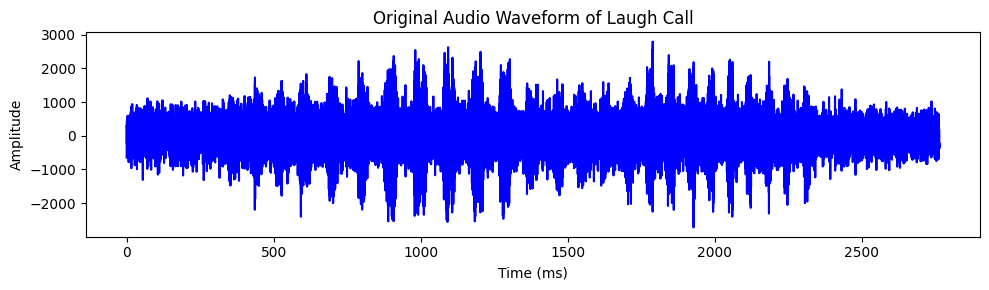

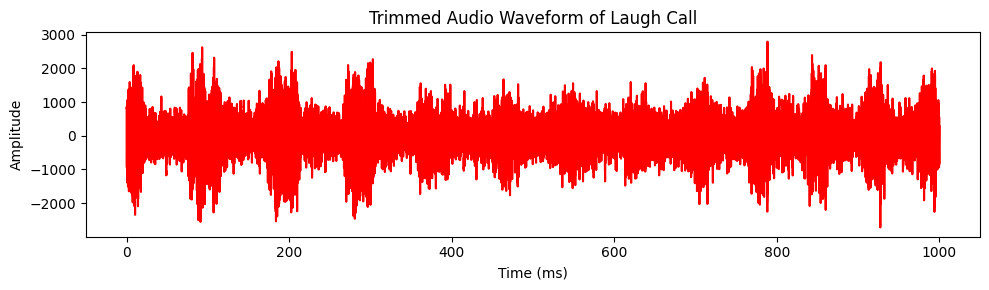

extracting from... /Users/calzada/birdsongs/wood/process_data/raw_train_data/drum_wavs


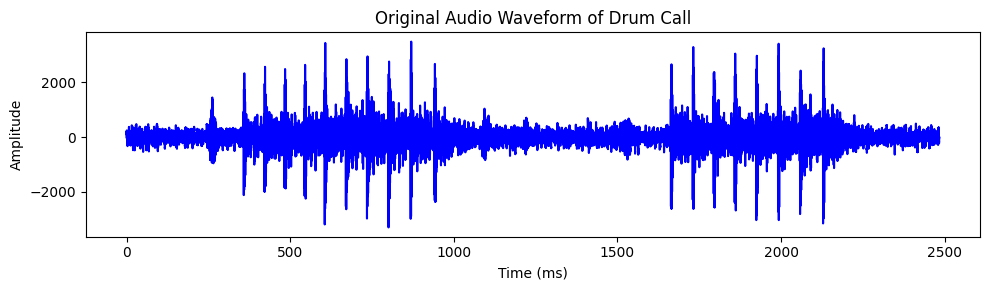

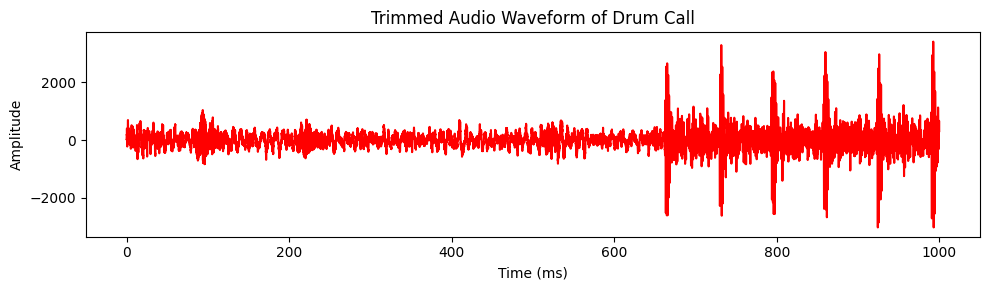

extracting from... /Users/calzada/birdsongs/wood/process_data/raw_train_data/pik_wavs


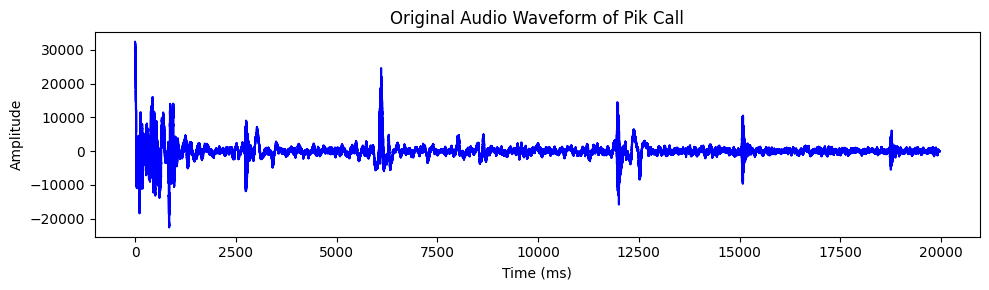

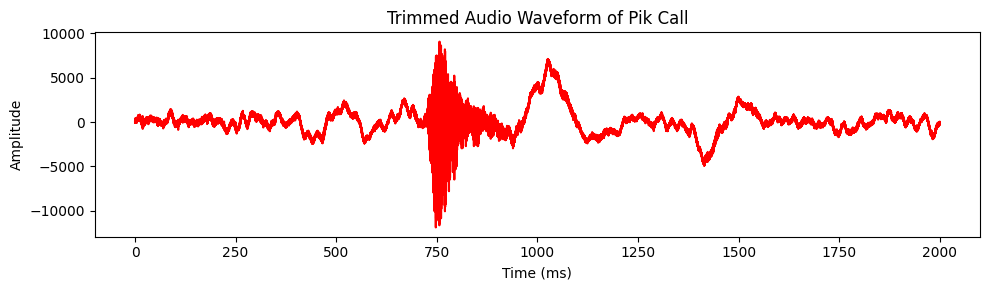

In [11]:
curr_dir = os.getcwd()

dirs = ['laugh_wavs', 'drum_wavs', 'pik_wavs']

start_time = 1
end_time = 2

for direc in dirs:
    
    new = os.path.join(curr_dir, 'raw_train_data', direc)
    print('extracting from...', new)
    name = (direc.split('_'))[0]
    waves = [os.path.join(new, x) for x in os.listdir(new)]
    chosen_wave = np.random.choice(waves, replace = False) # Choose three random waves from each directory to visualize
    audio = AudioSegment.from_file(chosen_wave, format="wav")

    # Extract raw audio data as a numpy array
    samples = np.array(audio.get_array_of_samples())
    
    # Time in ms 
    time = np.arange(0, len(samples)) / audio.frame_rate * 1000
    
    # Trim samples
    start_ms = 1000*start_time
    end_ms = 1000*end_time
    trimmed_audio = audio[start_ms:end_ms]
    trimmed_samples = np.array(trimmed_audio.get_array_of_samples())

    # Time in ms 
    trimmed_time = np.arange(0, len(trimmed_samples)) / trimmed_audio.frame_rate * 1000
    
    # Plots
    
    # Original audio plot 
    plt.figure(figsize=(10, 3))
    plt.plot(time, samples, color='b')
    plt.title(f'Original Audio Waveform of {name.capitalize()} Call')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Trimmed audio plot
    plt.figure(figsize=(10, 3))
    plt.plot(trimmed_time, trimmed_samples, color='r')
    plt.title(f'Trimmed Audio Waveform of {name.capitalize()} Call')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

### Define function to crop previously categorized waves.

In [12]:
def crop_wav(input_file, output_file, start_time, end_time):
    # loading in the wav file...
    audio = AudioSegment.from_wav(input_file)
    
    # start and end times in ms 
    start_ms = start_time * 1000
    end_ms = end_time * 1000
    
    cropped_audio = audio[start_ms:end_ms]
    cropped_audio.export(output_file, format="wav")

In [13]:
curr_dir = os.getcwd()
old_dirs = ['laugh_wavs', 'drum_wavs', 'pik_wavs']
start_time = 1
end_time = 2 

for direc in old_dirs:
    
    print(f'working on {direc}...')
    name = direc.split('_')[0] # 'laugh', 'drum', or 'pik'
    new = os.path.join(curr_dir, 'raw_train_data', direc)
    wav_files = glob(os.path.join(new, '*.wav'))
    
    for wav_file in tqdm(wav_files):
    
        input_file = wav_file
        output_directory = os.path.join(curr_dir, 'clean', f'clean_{name}')
        os.makedirs(output_directory, exist_ok=True)  # Ensure output directory exists
        out_name = os.path.basename(wav_file)  # get unique number id 
        output_file = os.path.join(output_directory, f'trimmed_{out_name}')
        crop_wav(input_file, output_file, start_time, end_time)

working on laugh_wavs...


100%|██████████| 96/96 [00:00<00:00, 182.82it/s]


working on drum_wavs...


100%|██████████| 28/28 [00:00<00:00, 54.39it/s]


working on pik_wavs...


100%|██████████| 36/36 [00:00<00:00, 65.25it/s] 


### Getting the duration of each trimmed clip to ensure length of 1 second. 

In [14]:
def get_wav_duration(file_path):
    y, sr = librosa.load(file_path, sr=None)
    dur = len(y)/sr
    return dur 

In [17]:
curr_dir = os.getcwd()
clean_data_dir = 'clean'

for direc in os.listdir(clean_data_dir):
    print(f'Working on {direc}...')
    subdir_path = os.path.join(clean_data_dir, direc)
    wav_files = glob(os.path.join(subdir_path, '*.wav'))

    for wav_file in tqdm(wav_files):
        duration = get_wav_duration(wav_file)
        print(f'{wav_file}: {duration:.2f} second(s)')

Working on clean_drum...


100%|██████████| 28/28 [00:00<00:00, 43.97it/s]


clean/clean_drum/trimmed_612611097.wav: 1.00 second(s)
clean/clean_drum/trimmed_589039401.wav: 1.00 second(s)
clean/clean_drum/trimmed_613667238.wav: 1.00 second(s)
clean/clean_drum/trimmed_555301551.wav: 1.00 second(s)
clean/clean_drum/trimmed_559161651.wav: 1.00 second(s)
clean/clean_drum/trimmed_534396281.wav: 1.00 second(s)
clean/clean_drum/trimmed_544869351.wav: 1.00 second(s)
clean/clean_drum/trimmed_546422771.wav: 1.00 second(s)
clean/clean_drum/trimmed_578716631.wav: 1.00 second(s)
clean/clean_drum/trimmed_615978417.wav: 1.00 second(s)
clean/clean_drum/trimmed_576688941.wav: 1.00 second(s)
clean/clean_drum/trimmed_608516473.wav: 1.00 second(s)
clean/clean_drum/trimmed_531414841.wav: 1.00 second(s)
clean/clean_drum/trimmed_569372771.wav: 1.00 second(s)
clean/clean_drum/trimmed_561957241.wav: 1.00 second(s)
clean/clean_drum/trimmed_539778701.wav: 1.00 second(s)
clean/clean_drum/trimmed_556704291.wav: 1.00 second(s)
clean/clean_drum/trimmed_551720221.wav: 1.00 second(s)
clean/clea

100%|██████████| 36/36 [00:00<00:00, 3736.39it/s]


clean/clean_pik/trimmed_613669818.wav: 1.00 second(s)
clean/clean_pik/trimmed_522725601.wav: 1.00 second(s)
clean/clean_pik/trimmed_519072681.wav: 1.00 second(s)
clean/clean_pik/trimmed_612959583.wav: 1.00 second(s)
clean/clean_pik/trimmed_564833211.wav: 1.00 second(s)
clean/clean_pik/trimmed_513271751.wav: 1.00 second(s)
clean/clean_pik/trimmed_611874434.wav: 1.00 second(s)
clean/clean_pik/trimmed_609431998.wav: 1.00 second(s)
clean/clean_pik/trimmed_518754901.wav: 1.00 second(s)
clean/clean_pik/trimmed_612276363.wav: 1.00 second(s)
clean/clean_pik/trimmed_508251571.wav: 1.00 second(s)
clean/clean_pik/trimmed_592245551.wav: 1.00 second(s)
clean/clean_pik/trimmed_612880680.wav: 1.00 second(s)
clean/clean_pik/trimmed_514678191.wav: 1.00 second(s)
clean/clean_pik/trimmed_611598666.wav: 1.00 second(s)
clean/clean_pik/trimmed_554588851.wav: 1.00 second(s)
clean/clean_pik/trimmed_516760751.wav: 1.00 second(s)
clean/clean_pik/trimmed_533682381.wav: 1.00 second(s)
clean/clean_pik/trimmed_6159

100%|██████████| 96/96 [00:00<00:00, 4904.24it/s]

clean/clean_laugh/trimmed_610208639.wav: 1.00 second(s)
clean/clean_laugh/trimmed_532607181.wav: 1.00 second(s)
clean/clean_laugh/trimmed_513966371.wav: 1.00 second(s)
clean/clean_laugh/trimmed_609137302.wav: 1.00 second(s)
clean/clean_laugh/trimmed_546095841.wav: 1.00 second(s)
clean/clean_laugh/trimmed_611315769.wav: 1.00 second(s)
clean/clean_laugh/trimmed_528426921.wav: 1.00 second(s)
clean/clean_laugh/trimmed_609135510.wav: 1.00 second(s)
clean/clean_laugh/trimmed_610811152.wav: 1.00 second(s)
clean/clean_laugh/trimmed_533335161.wav: 1.00 second(s)
clean/clean_laugh/trimmed_608437193.wav: 1.00 second(s)
clean/clean_laugh/trimmed_611437768.wav: 1.00 second(s)
clean/clean_laugh/trimmed_585057381.wav: 1.00 second(s)
clean/clean_laugh/trimmed_601691351.wav: 1.00 second(s)
clean/clean_laugh/trimmed_601859871.wav: 1.00 second(s)
clean/clean_laugh/trimmed_608991727.wav: 1.00 second(s)
clean/clean_laugh/trimmed_540806061.wav: 1.00 second(s)
clean/clean_laugh/trimmed_597654171.wav: 1.00 se